In [44]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [45]:
x = [ [0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35] ]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [46]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [47]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8615939258756776


In [48]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: 5.52257927519819
slope: [0.44706965 0.25502548]


In [49]:
print(f"coefficients: {model.coef_}")

coefficients: [0.44706965 0.25502548]


In [50]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


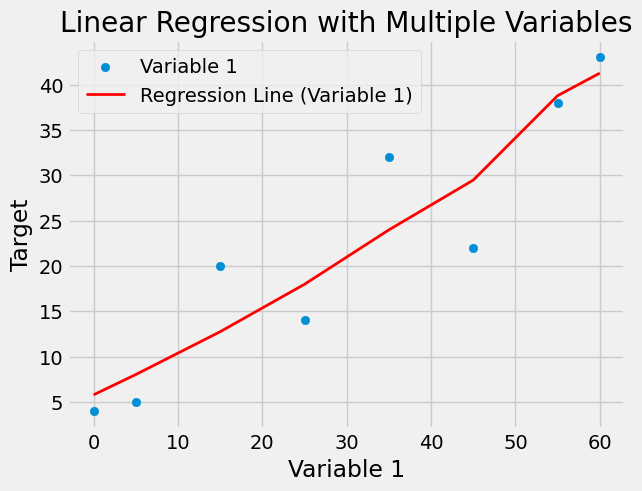

In [62]:
plt.scatter(x[:, 0], y, label='Variable 1')
plt.plot(x[:, 0], y_pred, color='red', linewidth=2, label='Regression Line (Variable 1)')

# Customize the plot
plt.xlabel('Variable 1')
plt.ylabel('Target')
plt.legend()
plt.title('Linear Regression with Multiple Variables')
plt.grid(True)

# Show the plot
plt.show()


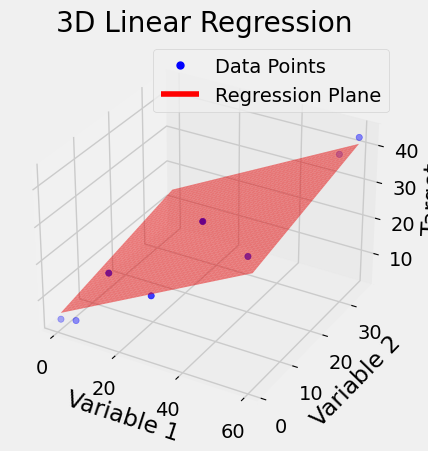

In [67]:
# Create a meshgrid for the independent variables
x1, x2 = np.meshgrid(np.linspace(x[:, 0].min(), x[:, 0].max(), 50),
                     np.linspace(x[:, 1].min(), x[:, 1].max(), 50))

# Predict using the model for the meshgrid
z = model.predict(np.c_[x1.ravel(), x2.ravel()])
z = z.reshape(x1.shape)

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(x[:, 0], x[:, 1], y, c='b', marker='o', label='Data Points')

# Plot the regression plane
ax.plot_surface(x1, x2, z, color='r', alpha=0.5)

# Customize the plot
ax.set_xlabel('Variable 1')
ax.set_ylabel('Variable 2')
ax.set_zlabel('Target')

# Create a manual legend
data_points_legend = plt.Line2D([0], [0], linestyle="none", marker="o", markersize=5, color="b", label="Data Points")
regression_legend = plt.Line2D([0], [0], linestyle="-", color="r", label="Regression Plane")
ax.legend(handles=[data_points_legend, regression_legend])

ax.set_title('3D Linear Regression')

# Show the plot
plt.show()